In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

plt.style.use("ggplot")
color_palette = ["#B1E7E5", "#63D9D5", "#1EF3EB", "#08F9C3", "#08F99F","#08F971", "#0AF93D", "#90F90A", "#E8F90A", "#FDDB07"]

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/elon-musk-news-articles-corpora/Elon_musk_articles.csv


In [2]:
data = pd.read_csv("/kaggle/input/elon-musk-news-articles-corpora/Elon_musk_articles.csv")
print(f"DATA'S DIMENSION: {data.shape}\n")
print(f"DATA'S NAN SUM: {data.isnull().sum().sum()}\n")
print("DATA'S DUPLICATE ROWS: ")
data.loc[data.duplicated() == 1]

DATA'S DIMENSION: (5000, 17)

DATA'S NAN SUM: 2710

DATA'S DUPLICATE ROWS: 


,_id,title,author,published_date,link,clean_url,excerpt,summary,rights,article_rank,topic,country,language,authors,media,twitter_account,article_score


In [3]:
data.head(1)

,_id,title,author,published_date,link,clean_url,excerpt,summary,rights,article_rank,topic,country,language,authors,media,twitter_account,article_score
0,aeb7516f5d92102a7fb065bb979d1ca9,"How Elon Musk, Jack Dorsey, and Parag Agrawal ...",The Verge,30-09-2022 00:30,https://www.newsbreak.com/news/2766864647680/h...,newsbreak.com,Elon Musk's deposition for the Twitter v. Musk...,#Linus Elon Musk#Linus Business#Business Leade...,newsbreak.com,4828,news,PH,en,"Adi Robertson,The Verge",https://img.particlenews.com/img/id/27ZFhy_0iF...,@newsbreak,23.075157


In [4]:
df = data[["title", "published_date", "excerpt", "summary", "topic", "country", "language", "author",
          "article_score", "article_rank"]].copy()

# **Data Processing**

In [5]:
print(f"NEW DATA'S SUM: {df.isnull().sum().sum()}")
(df.isnull().sum())[df.isnull().sum() > 0]

NEW DATA'S SUM: 614


excerpt     38
summary     14
author     562
dtype: int64

In [6]:
def process_data(dataframe):
    # Datetime format
    dataframe["published_date"] = dataframe["published_date"].astype(np.datetime64)
    dataframe["month"] = dataframe["published_date"].dt.month
    dataframe["year"] = dataframe["published_date"].dt.year
    
    # Fill nan
    dataframe["author"].fillna("unknown", inplace=True) 
    
    # Drop missing entries by taking the union of their indices
    drop_index = set(dataframe.loc[dataframe["excerpt"].isnull()].index) | set(dataframe.loc[dataframe["summary"].isnull()].index)
    dataframe.drop(index=drop_index, inplace=True)

In [7]:
df_copy = df.copy()
process_data(df)

# **Who are the most frequent authors/publishers?**

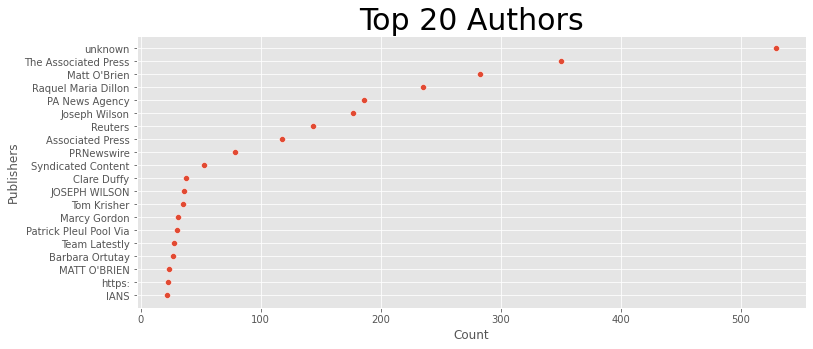

In [8]:
plt.figure(figsize=(12,5))

authors = df.author.value_counts().nlargest(20).index
count = df.author.value_counts().nlargest(20).values
sns.scatterplot(y=authors, x=count)

plt.title("Top 20 Authors", fontsize=30)
plt.xlabel("Count")
plt.ylabel("Publishers")
plt.show()

**Top 3 Most Frequent authors**
* Matt O' Brien
* Raquel Maria Dillon
* Joseph Wilson

**Top 3 Most Frequent Publishers**
* The Associated Press
* PA News Agency
* Joseph Reuters

> **The majority of the articles were either published anonymously or their authors were unidentified**

# **Which countries are more involved, and how many different languages are the articles in? What are the most popular languages these articles are written in?**

In [9]:
def pie(dataframe, feature, title, n_largest=50, color_palette=color_palette, white_center_radius=.35):
    
    labels = dataframe[feature].value_counts().nlargest(n_largest).index
    values = dataframe[feature].value_counts().nlargest(n_largest).values
    plt.pie(values, labels=labels, shadow=True, colors=color_palette, autopct="%1.1f%%")
    plt.title(title)
    
    white_center = plt.Circle(xy=(0,0), radius=white_center_radius, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(white_center)

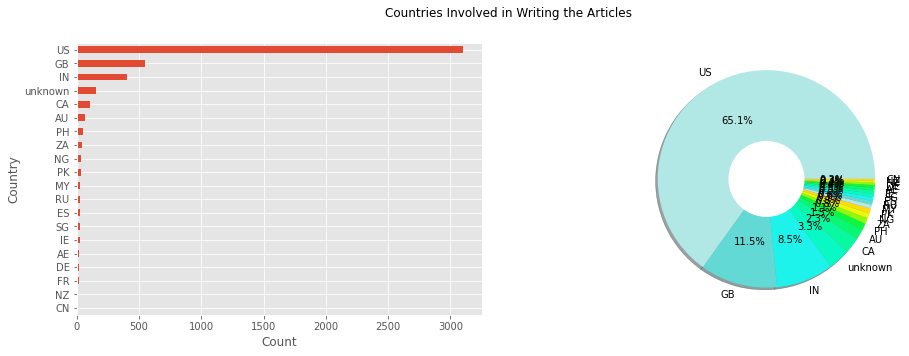

In [10]:
plt.figure(figsize=(16,5))
plt.suptitle("Countries Involved in Writing the Articles")

plt.subplot(121)
df.country.value_counts().nlargest(20).sort_values().plot(kind="barh")
plt.xlabel("Count")
plt.ylabel("Country")

plt.subplot(122)
pie(df, "country", title=None, n_largest=20)

plt.show()

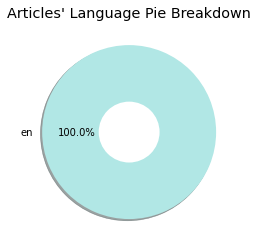

In [11]:
pie(df, "language", "Articles' Language Pie Breakdown")

**Top 3 Countries Involved in Writing the Articles**
* United States
* United Kingdom
* India

**Articles' Language**:
* English

# **What do the articles that have the highest marks in article_score and article_rank share in common?**
> **What are frequently included in the titles? Any exaggerations?**

In [12]:
# Select only top 200
high_engagement = df.sort_values(by="article_score", ascending=False)[:200]
high_rank = df.sort_values(by="article_rank")[:200]

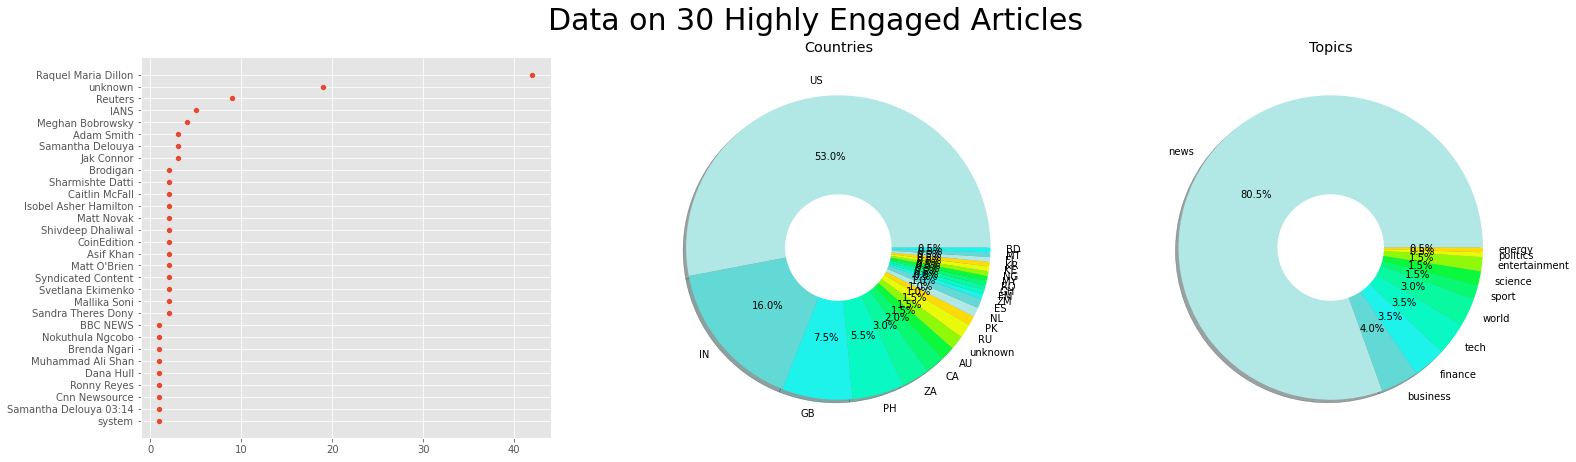

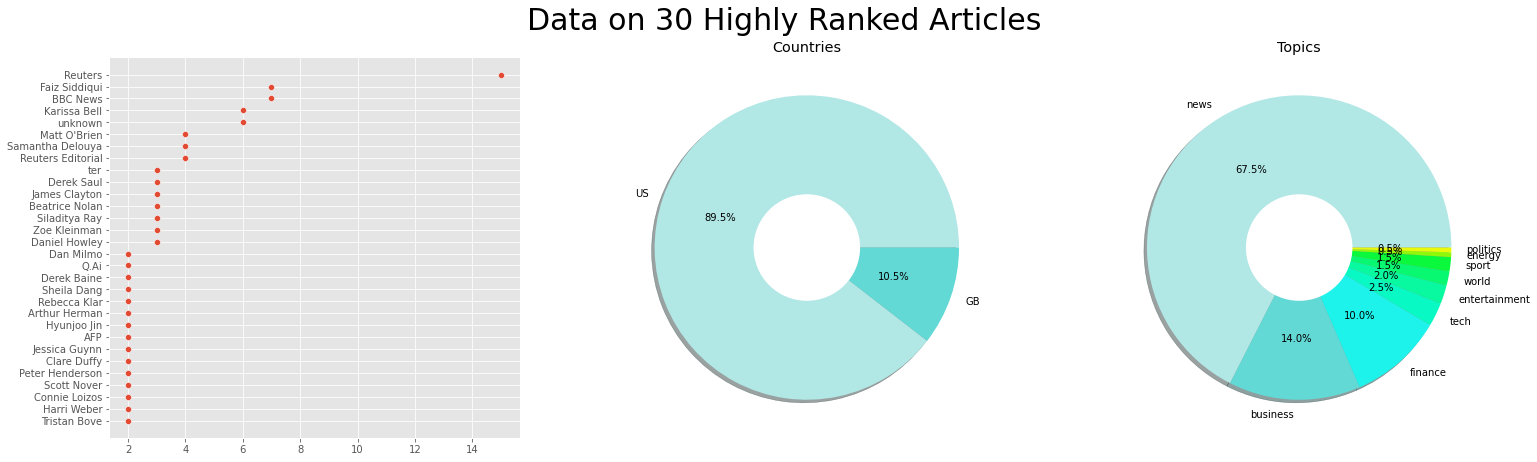

In [13]:
for i,d in enumerate([high_engagement, high_rank]):
    
    plt.figure(figsize=(25,7))
    if i == 0: plt.suptitle("Data on 30 Highly Engaged Articles", fontsize=30)
    else: plt.suptitle("Data on 30 Highly Ranked Articles", fontsize=30)
        
    # Who are the publishers/authors involved?
    plt.subplot(131) 
    authors = d.author.value_counts().nlargest(30).index
    count = d.author.value_counts().nlargest(30).values
    sns.scatterplot(y=authors, x=count)
    
    # Which countries wrote the articles?
    plt.subplot(132)
    pie(d, feature="country", title="Countries", n_largest=30)
    
    # What topics are popular?
    plt.subplot(133)
    pie(d, feature="topic", title="Topics", n_largest=30)

**Publishers**
* **Highly engaged articles**:
* **Highly ranked articles**:

**Countries**
* **Highly engaged articles** are diversely written by **many countries**
* **Highly ranked articles** are written mostly by **US news agencies**

**Topics**
* **Both article types** deal with **news** as the primary topics, although **highly ranked articles** deal with **business** more

In [14]:
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = set(stopwords.words("english"))
for w in ["say", "says", "could", "would"]: stopwords.add(w)
    
# Join titles into a string
high_engagement_titles = " ".join([title for title in high_engagement.title])
high_rank_titles = " ".join([title for title in high_rank.title]) 

In [15]:
def wordcloud_maker(text, title, interpolation_technique="bilinear", collocations_status=True, stopwords=stopwords):
    wordcloud = WordCloud(collocations=collocations_status, background_color="black", stopwords=stopwords).generate(text)
    plt.imshow(wordcloud, interpolation=interpolation_technique)
    plt.title(title, fontsize=30)
    plt.axis("off")

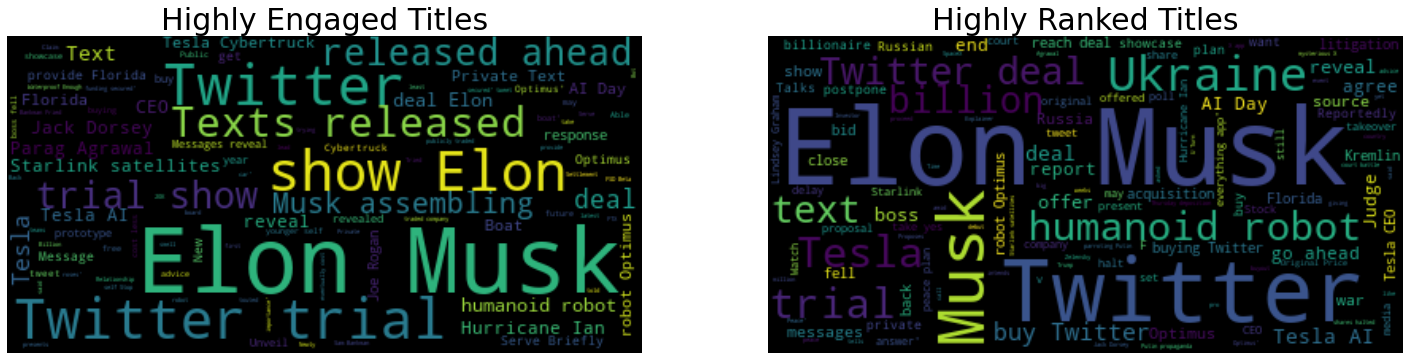

In [16]:
T = (high_engagement_titles, high_rank_titles)

plt.figure(figsize=(25,12))
for i,title in enumerate(["Highly Engaged Titles", "Highly Ranked Titles"]):
    plt.subplot(1,2,i+1)
    wordcloud_maker(text=T[i], title=title)
plt.show()

**Highly Engaged Titles**
* Released information
* New release on humanoid robot

**Highly Ranked Titles**
* Twitter's purchase
* AI

In [17]:
"""Modeling titles' topics"""

# Thanks to: https://www.kaggle.com/code/cdeotte/rapids-umap-tfidf-kmeans-discovers-15-topics/notebook#Display-Essay-Topics

high_engagement_titles = high_engagement.title.tolist()
high_rank_titles = high_rank.title.tolist()

In [18]:
import cudf, cuml, cupy
import numpy as np
print('RAPIDS',cudf.__version__)

RAPIDS 21.10.01


**First, process text to remove stopwords and contractions**

In [19]:
import re
def decontracted(phrase: str) -> str:
    """decontracted takes text and convert contractions into their natural form."""

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [20]:
import nltk
from nltk.tokenize import word_tokenize
import string

def process_text(text_list: list, stopwords=stopwords) -> list:
    new_text_list = []
    
    for sentence in text_list:
        """Fix contractions then lemmatize"""
        sentence_token_list = word_tokenize(decontracted(sentence.lower()))
        
        """Strip stopwords"""
        sentence_new_token_list = [word for word in sentence_token_list if word not in stopwords and word not in string.punctuation]
        new_text_list.append(" ".join(sentence_new_token_list))
    return new_text_list    

In [21]:
processed_engagement_titles = process_text(high_engagement_titles)
processed_rank_titles = process_text(high_rank_titles)

In [22]:
processed_titles_df = cudf.DataFrame({"processed_engagement_titles":processed_engagement_titles, 
                                      "processed_rank_titles":processed_rank_titles})

**Map the data to a lower dimension using TF-IDF Vectorizer, UMAP, and KMeans Clustering**

In [23]:
"""TF-IDF"""
from cuml.feature_extraction.text import TfidfVectorizer

tfidf_engagement = TfidfVectorizer(max_features=25_000)
tfidf_rank = TfidfVectorizer(max_features=25_000)

# Creates a text embedding vector for each title
engagementVector = tfidf_engagement.fit_transform(processed_titles_df.processed_engagement_titles).toarray()
rankVector = tfidf_rank.fit_transform(processed_titles_df.processed_rank_titles).toarray()

In [24]:
"""UMAP"""
from cuml import UMAP

def umap_D_reduction(VECTOR):
    umap_reducer = UMAP()
    umap_result = cupy.asnumpy( umap_reducer.fit_transform(VECTOR) )
    return umap_result

# Reduce each title's embedding to R2 space
high_engagement_titles_umap = umap_D_reduction(engagementVector)
high_rank_titles_umap = umap_D_reduction(rankVector)

In [25]:
"""KMEANS"""

from cuml import KMeans

MSE_engagement = []
MSE_rank = []

for k in range(2,9):
    k_means_params = dict(n_clusters=k,
                   init='k-means++',
                   n_init=20,
                   max_iter=1000)
    
    kmeans = cuml.KMeans(**k_means_params).fit(high_engagement_titles_umap)
    MSE_engagement.append(kmeans.inertia_)
    
    kmeans = cuml.KMeans(**k_means_params).fit(high_rank_titles_umap)
    MSE_rank.append(kmeans.inertia_)

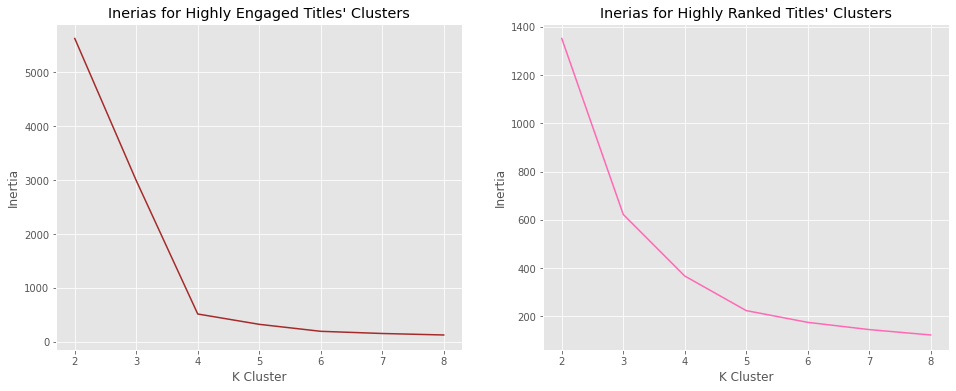

In [26]:
xaxis = np.arange(2,9)

plt.figure(figsize=(16,6))
plt.subplot(121)
sns.lineplot(x=xaxis, y=MSE_engagement, color="brown").set(title="Inerias for Highly Engaged Titles' Clusters")
plt.xlabel("K Cluster")
plt.ylabel("Inertia")

plt.subplot(122)
sns.lineplot(x=xaxis, y=MSE_rank, color="hotPink").set(title="Inerias for Highly Ranked Titles' Clusters")
plt.xlabel("K Cluster")
plt.ylabel("Inertia")
plt.show()

> We will use **5 clusters** for **highly engaged titles**

> We will use **5 clusters** for **highly ranked titles** 

In [27]:
k = 5

kmeans = KMeans(n_clusters=k, n_init=20, max_iter=1000).fit(high_engagement_titles_umap)
engagement_labels = kmeans.labels_
engagement_centers = kmeans.cluster_centers_

kmeans = KMeans(n_clusters=k, n_init=20, max_iter=1000).fit(high_rank_titles_umap)
rank_labels = kmeans.labels_
rank_centers = kmeans.cluster_centers_

In [28]:
processed_titles_df["engagement_cluster"] = engagement_labels
processed_titles_df["rank_cluster"]  = rank_labels

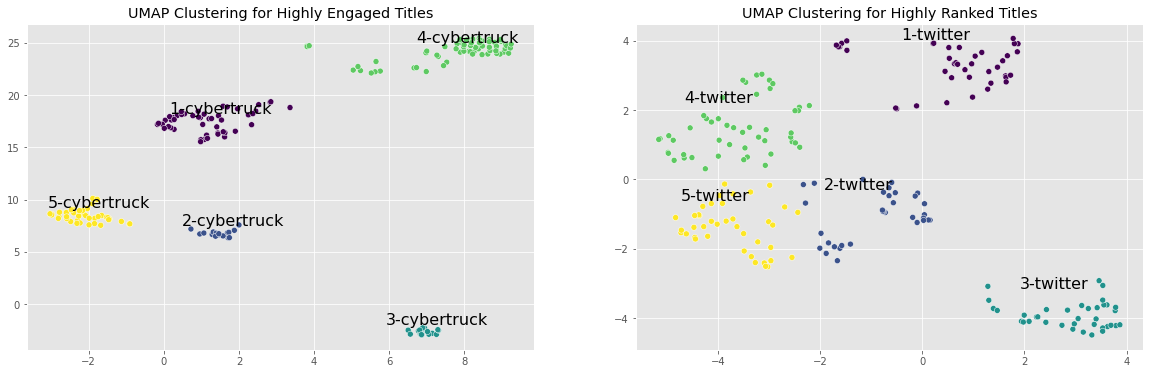

In [29]:
plt.figure(figsize=(20,6))

plt.subplot(121)
sns.scatterplot(x = high_engagement_titles_umap[:,0],
               y = high_engagement_titles_umap[:,1],
               c = engagement_labels).set(title="UMAP Clustering for Highly Engaged Titles")

for k in range(len(engagement_centers)):
    cluster_mean = cupy.mean( engagementVector[processed_titles_df.engagement_cluster.values==1],axis=0 )
    ii = cupy.argmax(cluster_mean)
    top_word = tfidf_engagement.vocabulary_.iloc[ii]
    plt.text(engagement_centers[k,0]-1, engagement_centers[k,1]+.75, f"{k+1}-{top_word}", size=16)

    
plt.subplot(122)
sns.scatterplot(x = high_rank_titles_umap[:,0],
               y = high_rank_titles_umap[:,1],
               c = rank_labels).set(title="UMAP Clustering for Highly Ranked Titles")


for k in range(len(rank_centers)):
    cluster_mean = cupy.mean( rankVector[processed_titles_df.rank_cluster.values==1],axis=0 )
    ii = cupy.argmax(cluster_mean)
    top_word = tfidf_rank.vocabulary_.iloc[ii]
    plt.text(rank_centers[k,0]-1, rank_centers[k,1]+.75, f"{k+1}-{top_word}", size=16)
plt.show()

# **What topics about Elon Musk do the articles focus on?**